In [1]:
import numpy as np
import codecs

class NN(object):
    """ni,nh,no,Wi,Wh,ai,ah,ao
        为啥准确率会有变动
    """

    def __init__(self, ni, nh, no):
        # 各层神经元个数
        self.ni = ni  #偏置已经在训练集加入，多加一个 1
        self.nh = nh
        self.no = no
        # 三个列向量
        self.ai = np.mat(np.ones(ni)).T
        self.ah = np.mat(np.ones(nh)).T
        self.ao = np.mat(np.ones(no)).T
        # 系数矩阵
        self.WI = np.random.rand(nh, ni) * 4 - 2
        self.WH = np.random.rand(no, nh) * 4 - 2
        self.preWI = np.random.rand(nh, ni) * 4 - 2
        self.preWH = np.random.rand(no, nh) * 4 - 2
        

    def update(self, inputs):
        """计算输入到输出"""
        self.ai = np.mat(inputs).T
        self.ah = self.__sigmoid(self.WI * self.ai)
        self.ao = self.__sigmoid(self.WH * self.ah)
        return self.ao

    def back_pro(self, targets, alpha, beta):
        """numpy  反向传播"""
        targets = np.mat(targets).T
        # 计算变化量
        delta_output = np.multiply(np.multiply(
            self.ao, (1 - self.ao)), (targets - self.ao))
        delta_hidden = np.multiply(np.multiply(
            self.ah, (1 - self.ah)), self.WH.T * delta_output)
        # 更新权重矩阵
        self.WH = self.WH + alpha * delta_output * self.ah.T + beta * self.preWH
        self.preWH = delta_output * self.ah.T
        self.WI = self.WI + alpha * delta_hidden * self.ai.T + beta * self.preWI
        self.preWI = delta_hidden * self.ai.T
        error = 0.5 * \
            np.sum(np.multiply((self.ao - targets), (self.ao - targets)))
        return error

    def train(self, X, Y, MAX_ITR=100, alpha=0.5, beta=0.1):
        """训练"""
        for t in xrange(MAX_ITR):
            err=0
            for k in range(X.shape[0]):
                self.update(X[k, :])
                err+=self.back_pro(Y[k, :], alpha, beta)
            if t%5==0:
                print t,':',err
    def batch_train(self, X, Y, MAX_ITR=100, alpha=0.5, beta=0.1):
        """不能使误差变小"""
        for t in xrange(MAX_ITR):
            err=0
            #for k in range(X.shape[0]):
            self.update(X)
            err=self.back_pro(Y, alpha, beta)
            if t%5==0:
                print t,':',err
    def test(self, X, Y):
        cntall = 0
        cntright = 0
        for i in range(X.shape[0]):
            cntall += 1
            pre = self.update(X[i])
            pre[pre > 0.5] = 1
            pre[pre <= 0.5] = 0
            # print pre.T
            if (pre.T - Y[i, :]).sum()==0:           
                cntright += 1
        print cntright / np.float64(cntall)

    def __sigmoid(self, X):
        return 1 / (1 + np.exp(-X))

def prepare_data_1():
    """异或关系学习"""
    X =np.array([
        [0, 0,1],
        [0, 1,1],
        [1, 0,1],
        [1, 1,1]
    ])
    Y=np.array([
        [0, 1],
        [ 0,1],
        [ 0,1],
        [ 0,1]
    ])
    return X,Y



def prepare_data(filepath):
    infp = codecs.open(filepath, 'r', 'utf-8')
    retX = []
    retY = []
    for line in infp:
        if not line.strip():
            continue
        X, Y = line.strip().split('>')
        X = [np.float64(x) for x in X.split()]
        Y = [np.float64(x) for x in Y.split()]
        X.append(1.0)   #加偏置
        retX.append(X)
        retY.append(Y)
    return np.mat(retX), np.mat(retY)
#异或学习自测
#X, Y = prepare_data_1()
#neu = NN(X.shape[1], 10, Y.shape[1])
#neu.train(X[0:4, :], Y[0:4, :])
#neu.test(X[0:4, :], Y[0:4, :])
#代码类别检测学习
X,Y=prepare_data('testdata.1k')
neu = NN(X.shape[1], 20, Y.shape[1])
neu.train(X[0:900, :], Y[0:900, :])
neu.test(X[900:1000, :], Y[900:1000, :])


0 : 138.030819428
5 : 28.4675383142
10 : 18.733609665
15 : 14.4989870252
20 : 11.5954465216
25 : 9.77293632421
30 : 8.65319620747
35 : 7.90692961449
40 : 7.38349857757
45 : 7.00121467597
50 : 6.70544089715
55 : 6.45980159255
60 : 6.24130346171
65 : 6.03639481494
70 : 5.83798596119
75 : 5.6433368848
80 : 5.45247581028
85 : 5.26703450246
90 : 5.08961375144
95 : 4.92328500946
0.99


Populating the interactive namespace from numpy and matplotlib


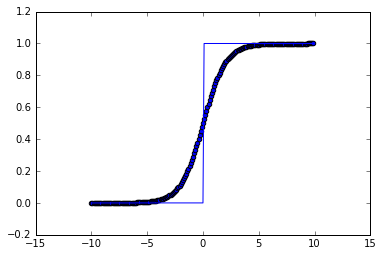

In [16]:
%pylab inline
x=np.arange(-10,10,0.1)
yy=1/(1+np.exp(-x))
y=0.5*(np.tanh(.5*x)+1)
#print x,y
scatter(x,yy)
y[y>0.5] =1
y[y<=0.5]=0
plot(x,y)